# Plan-Merging-Project-Sauerbrei-Raatschen
## Notebook for visualising data

### Setting up the project

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
#df = pd.read_csv("./solvers/results.csv")
df = pd.read_csv("./results.csv")
solveddf = df[df['satisfied'] == True]


allSolver = ["IS","PP","CBS-SOC","GICBS-SOC","ICBS-SOC","MCBS-SOC","MICBS-SOC","CBS-MS","GICBS-MS","ICBS-MS","MCBS-MS","MICBS-MS"]

allSolver = ["IS","PP","CBS-SOC","GICBS-SOC"]

In [3]:
#Splitting data by solver 

#Dataframe of sequential planning
spdf = df[df['solver'] == 'IS']

#Dataframe of prioritized planning
ppdf = df[df['solver'] == 'PP']

#Dataframe of cbs
cbsdf = df[df['solver'] == 'CBS-SOC']

singledf= {}

for solver in allSolver:
    
    #no filter
    #singledf[solver] = df[df['solver'] == solver]
    
    #filter all solved instances
    singledf[solver] = solveddf[solveddf['solver'] == solver]

In [4]:
#Joining data by instance

combineddf = singledf[allSolver[0]].set_index('instance').add_suffix("_"+allSolver[0])

for i in range(1,len(allSolver)):

    combineddf = combineddf.join(singledf[allSolver[i]].set_index('instance').add_suffix('_'+allSolver[i]),lsuffix="",rsuffix="")


## Functions

4
4
4
4


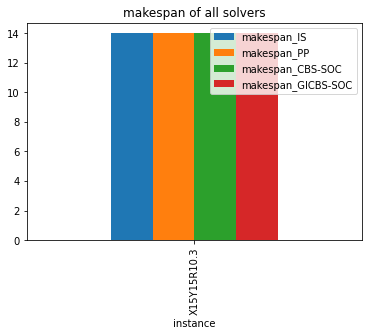

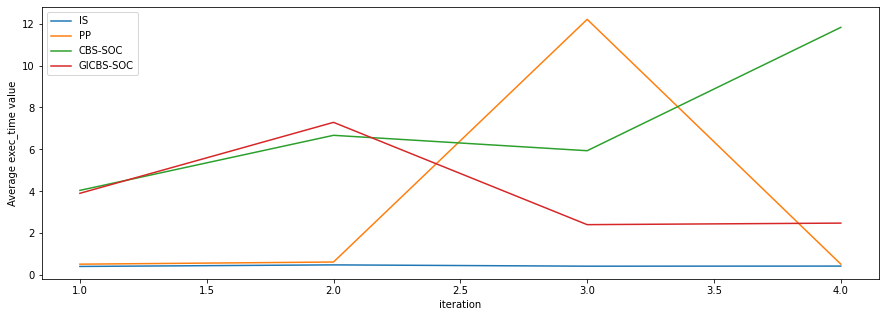

In [5]:
def plotInstance(instanceName : str, df : pd.DataFrame,dataToPlot :str):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance to analyze
    :param df: Dataframe indexed by instance
    :return: None
    """ 
    
    newdf = df.filter(like = instanceName, axis = 0)
    
    keyTable = []
    
    for i in allSolver:
        keyTable.append(dataToPlot+"_"+i)
    
    ax = newdf[keyTable].plot.bar(title = dataToPlot+' of all solvers')


def averageValue(instanceName : str,solverName : str, df : pd.DataFrame,dataToPlot: str, iterationNumber = -1):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param solverName: Name of the used solver, e.g. "SP", "PP", "CBS"
    :param df: Dataframe indexed by instance
    :param iterationNumber: (Optional) number of iteration to be looked at
    :return: None
    """ 
    if iterationNumber != -1: instanceName = instanceName+str(iterationNumber)
        
    newdf = df.filter(like = instanceName, axis = 0)
    newdf = newdf[dataToPlot+"_"+solverName]
    
    if newdf.size == 0:
        return 0
    
    return newdf.sum() / newdf.size

def plotScale(instanceName : str, df : pd.DataFrame, dataToPlot: str):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param df: Dataframe indexed by instance
    :return: A list, containing for every solver a dataframe, with the avg_time per iteration
    """ 
    newdf = df.filter(like = instanceName, axis = 0)

    allResults = []
    
    for solver in allSolver:
        solverResult = pd.DataFrame(columns = ['iteration','avg_'+dataToPlot])
        numberOfIterations = len(newdf.filter(like = instanceName,axis = 0)) // len(newdf.filter(like = instanceName+"1.",axis = 0))
        print(numberOfIterations)
        for i in range(1,numberOfIterations+1):
            avg_value = averageValue(instanceName,solver, newdf,dataToPlot, iterationNumber = i)
            solverResult = solverResult.append(pd.DataFrame({'iteration':[i],'avg_'+dataToPlot:[avg_value]}),ignore_index=True)
        allResults.append(solverResult)
        
    ax = allResults[0].plot(x='iteration',y='avg_'+dataToPlot,label=allSolver[0])
    for dataNumber in range(1,len(allResults)):
        allResults[dataNumber].plot(ax=ax,x='iteration',y='avg_'+dataToPlot,label=allSolver[dataNumber],figsize=(15,5))
    ax.set_ylabel("Average " + dataToPlot + " value")
    
    return ax
    

    
    
plotInstance("X15Y15R10.3", combineddf,"makespan")
#print(averageTime("test","IS", combineddf, iterationNumber = 3))

dataOfThePlot = plotScale("X15Y15R5-Rooms",combineddf, "exec_time")



### Plotting data

<AxesSubplot:title={'center':'Exec_time for cbs'}, xlabel='instance'>

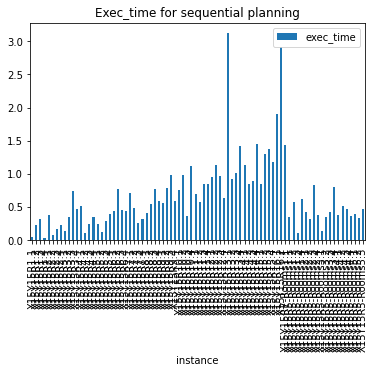

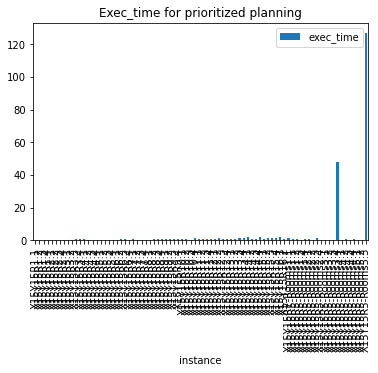

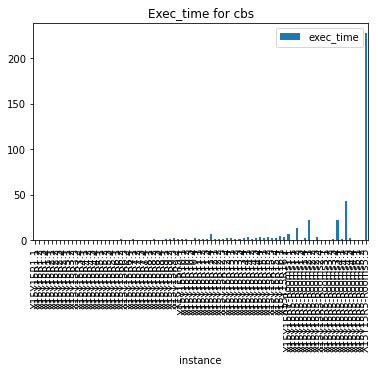

In [6]:
spdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for sequential planning')
ppdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for prioritized planning')
cbsdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for cbs')

<AxesSubplot:title={'center':'Exec_time of all solvers'}, xlabel='instance'>

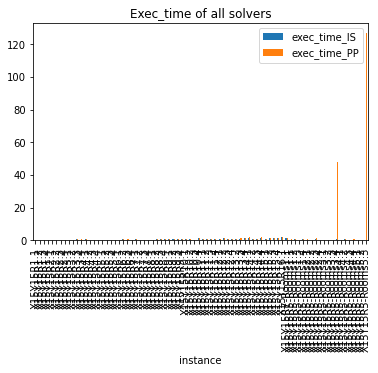

In [7]:
combineddf[['exec_time_IS','exec_time_PP' ]].plot.bar(title = 'Exec_time of all solvers')